# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename, header=0)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The data set that I have chosen is the Book Review Data Set.
2. The goal is to predict whether a book review is positive. The label will be the binary variable 'Positive_Review' where a positive review is True and otherwise is False.
3. This is a supervised learning problem because it uses a feature to predict a label. It's specifically a binary classification problem because the model will either predict a true or false based on the review it's given. 
4. The only feature within the data set is the 'Review' feature. After exploring the data, I’ll convert it into numeric features like TF–IDF, n‑grams, review length, punctuation counts, and sentiment scores. 
5. This is an important problem because automatically spotting positive reviews helps a bookseller see which titles resonate with readers. A company can use this signal to boost popular books in recommendations, plan inventory, focus marketing on high-likelihood hits, and generally increase sales and customer satisfaction.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
df.describe()

,Review,Positive Review
count,1973,1973
unique,1865,2
top,I have read several of Hiaasen's books and lov...,False
freq,3,993


In [4]:
print(df.shape)
print(list(df.columns))
print(df.head(10))

(1973, 2)
['Review', 'Positive Review']
                                              Review  Positive Review
0  This was perhaps the best of Johannes Steinhof...             True
1  This very fascinating book is a story written ...             True
2  The four tales in this collection are beautifu...             True
3  The book contained more profanity than I expec...            False
4  We have now entered a second time of deep conc...             True
5  I don't know why it won the National Book Awar...            False
6  The daughter of a prominent Boston doctor is d...            False
7  I was very disapointed in the book.Basicly the...            False
8  I think in retrospect I wasted my time on this...            False
9  I have a hard time understanding what it is th...            False


In [5]:
print(df['Review'].dtype)
print(df['Positive Review'].dtype)

object
bool


In [6]:
df.isna().mean().sort_values(ascending=False)

Review             0.0
Positive Review    0.0
dtype: float64

In [7]:
df.duplicated(subset=['Review']).sum()

108

In [8]:
df['Positive Review'].value_counts(normalize=True)

False    0.503294
True     0.496706
Name: Positive Review, dtype: float64

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

In terms of this data set, I don’t have a new feature list because there’s really only one feature which is the review text. Since the data is already clean, my plan is to label the examples, split into 70/30 train/test sets, and vectorize the text with TF‑IDF. For modeling, I will build a Keras Sequential network with an input layer, three hidden layers, and an output layer. After fitting, I’ll evaluate on the test set using accuracy. But first, I will set up a ParameterGrid over dropout, learning rate, batch size, and epochs, training each combo and recording both ROC AUC and accuracy to find the best trade‑off. Once I identify the top parameters, I’ll retrain the model, plot the ROC curve to visualize AUC, and plot training vs. validation loss and accuracy over epochs to check for overfitting. Finally, I’ll review misclassified reviews, if any, to decide if further preprocessing or architectural tweaks are needed.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
import tensorflow.keras as keras
import time
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

First, I will be creating labeled examples and splitting them intro training and test data sets.

In [11]:
#I will now create the labeled examples from the data set
X = df['Review']
y = df['Positive Review']

In [12]:
#These will be the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [13]:
#Here is the information of the test and data sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1381,)
(592,)
(1381,)
(592,)


Next, I will be setting up the ParameterGrid with all the hyper-parameters that I want to cycle through and record the AUC and accuracy scores that each combination gives within a list called results.

In [14]:
param_grid = {
    "dropout": [0.2, 0.3],
    "lr": [0.1, 0.01],
    "batch_size": [32, 64],
    "epochs": [10, 20]
}

#These variables will store the best auc score and accuracy score
results = []

In the next code block I loop over the grid of hyper‑parameter combinations. For each set, I first vectorize the review text with TF‑IDF, then build and compile a Keras neural network using those parameters. After training, I capture both the ROC AUC and accuracy for that model. By comparing results across the grid, I can pinpoint which hyper‑parameter combination delivers the best balance of AUC and accuracy.

In [17]:
for params in ParameterGrid(param_grid):
    #I implement the TF-IDF vectorizer first
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5)
    tfidf_vectorizer.fit(X_train)
    X_train_tfidf = tfidf_vectorizer.transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
    vocabulary_size = len(tfidf_vectorizer.vocabulary_)

    #Building the Nueral Network
    nn_model = keras.Sequential()

    # Input & dropout
    input_layer = keras.layers.InputLayer(input_shape=vocabulary_size)
    nn_model.add(input_layer)
    nn_model.add(keras.layers.Dropout(params["dropout"]))

    # Hidden layer 1
    hidden_layer_1 = keras.layers.Dense(units=256, activation='relu')
    nn_model.add(hidden_layer_1)
    nn_model.add(keras.layers.Dropout(params["dropout"]))

    # Hidden layer 2
    hidden_layer_2 = keras.layers.Dense(units=128, activation='relu')
    nn_model.add(hidden_layer_2)
    nn_model.add(keras.layers.Dropout(params["dropout"]))

    # Hidden layer 3
    hidden_layer_3 = keras.layers.Dense(units=64, activation='relu')
    nn_model.add(hidden_layer_3)
    nn_model.add(keras.layers.Dropout(params["dropout"]))

    # Output layer
    output_layer = keras.layers.Dense(units=1, activation='sigmoid')
    nn_model.add(output_layer)
    
    sgd_optimizer = keras.optimizers.SGD(learning_rate=params["lr"])
    loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
    
    #Here I compile the model
    nn_model.compile(optimizer=sgd_optimizer,loss=loss_fn,metrics=["AUC"])

    #This is where I train & time it
    t0 = time.time()
    nn_model.fit(X_train_tfidf.toarray(), y_train, validation_split=0.2, epochs=params["epochs"], batch_size=params["batch_size"], verbose=0)
    elapsed = time.time() - t0

    #This is where I evaluate on the test set
    y_proba = nn_model.predict(X_test_tfidf.toarray()).ravel()
    y_pred  = (y_proba >= 0.5).astype(int)
    auc_score = roc_auc_score(y_test, y_proba)
    acc_score = accuracy_score(y_test, y_pred)

    results.append({
        **params,
        "AUC":       auc_score,
        "Accuracy":  acc_score,
        "Time(s)":   elapsed
    })
    print(f"{params} → AUC={auc_score:.3f}, Acc={acc_score:.3f}, time={elapsed:.1f}s")

#I make the list into a data frame in order to see the best combinations
df_results = pd.DataFrame(results)

print("\nTop combos by AUC:")
print(df_results.sort_values("AUC", ascending=False).head())

print("\nTop combos by Accuracy:")
print(df_results.sort_values("Accuracy", ascending=False).head())

{'batch_size': 32, 'dropout': 0.2, 'epochs': 10, 'lr': 0.1} → AUC=0.872, Acc=0.522, time=2.2s
{'batch_size': 32, 'dropout': 0.2, 'epochs': 10, 'lr': 0.01} → AUC=0.586, Acc=0.483, time=2.1s
{'batch_size': 32, 'dropout': 0.2, 'epochs': 20, 'lr': 0.1} → AUC=0.919, Acc=0.534, time=3.6s
{'batch_size': 32, 'dropout': 0.2, 'epochs': 20, 'lr': 0.01} → AUC=0.594, Acc=0.483, time=3.5s
{'batch_size': 32, 'dropout': 0.3, 'epochs': 10, 'lr': 0.1} → AUC=0.861, Acc=0.483, time=2.1s
{'batch_size': 32, 'dropout': 0.3, 'epochs': 10, 'lr': 0.01} → AUC=0.541, Acc=0.483, time=2.1s
{'batch_size': 32, 'dropout': 0.3, 'epochs': 20, 'lr': 0.1} → AUC=0.910, Acc=0.823, time=3.5s
{'batch_size': 32, 'dropout': 0.3, 'epochs': 20, 'lr': 0.01} → AUC=0.609, Acc=0.483, time=3.5s
{'batch_size': 64, 'dropout': 0.2, 'epochs': 10, 'lr': 0.1} → AUC=0.773, Acc=0.483, time=1.8s
{'batch_size': 64, 'dropout': 0.2, 'epochs': 10, 'lr': 0.01} → AUC=0.600, Acc=0.483, time=1.8s
{'batch_size': 64, 'dropout': 0.2, 'epochs': 20, 'lr': 

The next code block checks which hyper-parameters gave the best scores individually.

In [18]:
best_auc_row = df_results.loc[df_results['AUC'].idxmax()]
print("Best by AUC:")
print(best_auc_row)

best_acc_row = df_results.loc[df_results['Accuracy'].idxmax()]
print("Best by Accuracy:")
print(best_acc_row)

Best by AUC:
batch_size    32.000000
dropout        0.200000
epochs        20.000000
lr             0.100000
AUC            0.918838
Accuracy       0.533784
Time(s)        3.558267
Name: 3, dtype: float64
Best by Accuracy:
batch_size    32.000000
dropout        0.300000
epochs        20.000000
lr             0.100000
AUC            0.910496
Accuracy       0.822635
Time(s)        3.467176
Name: 7, dtype: float64


I see that both of my top models used a batch size of 32, a learning rate of 0.1, and ran for 20 epochs. The only tweak was the dropout rate. With dropout = 0.2, I got the highest AUC (0.9188), which means the model ranks positive reviews above negatives most cleanly, but that model's accuracy was just 53.4%. When dropout switched to 0.3, AUC dipped slightly to 0.9105, yet accuracy jumped to 82.3% and all without adding any extra training time. Since I want both accuracy and AUC scores to be high, I’ll go with dropout = 0.3 for reliable predictions.

These next few code blocks I will be training the best model with the hyper-parameters that gave the best scores above. I will be renaiming each variable with _best at the end of it.

In [19]:
# 1. Create a TfidfVectorizer object 
tfidf_vectorizer_best = TfidfVectorizer(ngram_range=(1,2), min_df=5)


# 2. Fit the vectorizer to X_train
tfidf_vectorizer_best.fit(X_train)


# 3. Using the fitted vectorizer, transform the training data 
X_train_tfidf_best = tfidf_vectorizer_best.transform(X_train)


# 4. Using the fitted vectorizer, transform the test data 
X_test_tfidf_best = tfidf_vectorizer_best.transform(X_test)

In [20]:
vocabulary_size2 = len(tfidf_vectorizer_best.vocabulary_)

print(vocabulary_size2)

8556


This is where I compute the best neural network with dropout = 0.3.

In [21]:
# 1. Create model object
nn_model_best = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
input_layer = keras.layers.InputLayer(input_shape=vocabulary_size2)
nn_model_best.add(input_layer)
nn_model_best.add(keras.layers.Dropout(0.3))

# 3. Create the first hidden layer and add it to the model object:
hidden_layer_1 = keras.layers.Dense(units=256, activation='relu')
nn_model_best.add(hidden_layer_1)
nn_model_best.add(keras.layers.Dropout(0.3))

# 4. Create the second layer and add it to the model object:
hidden_layer_2 = keras.layers.Dense(units=128, activation='relu')
nn_model_best.add(hidden_layer_2)
nn_model_best.add(keras.layers.Dropout(0.3))

# 5. Create the third layer and add it to the model object:
hidden_layer_3 = keras.layers.Dense(units=64, activation='relu')
nn_model_best.add(hidden_layer_3)
nn_model_best.add(keras.layers.Dropout(0.3))

# 6. Create the output layer and add it to the model object:
output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model_best.add(output_layer)

# Print summary of neural network model structure
nn_model_best.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_72 (Dropout)         (None, 8556)              0         
_________________________________________________________________
dense_72 (Dense)             (None, 256)               2190592   
_________________________________________________________________
dropout_73 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_74 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_75 (Dropout)         (None, 64)              

Next, I create an optimizer with the learning rate of 0.1, and then create the loss_fn.

In [22]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

In [23]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

I finally compile the model and will fit it next.

In [24]:
nn_model_best.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy','AUC'])

In [25]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [26]:
t0 = time.time() # start time

num_epochs = 20 # epochs

history = nn_model_best.fit(X_train_tfidf_best.toarray(), y_train, batch_size=32, epochs=20, verbose=0, validation_split=0.2, callbacks=[ProgBarLoggerNEpochs(20, every_n=5)])

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 20], Loss: 0.6907, Accuracy: 0.5190, Auc: 0.5421, Val_loss: 0.6914, Val_accuracy: 0.5018, Val_auc: 0.6497
Epoch [10/ 20], Loss: 0.6795, Accuracy: 0.5842, Auc: 0.6506, Val_loss: 0.6826, Val_accuracy: 0.7004, Val_auc: 0.8139
Epoch [15/ 20], Loss: 0.6186, Accuracy: 0.7074, Auc: 0.7895, Val_loss: 0.6214, Val_accuracy: 0.7365, Val_auc: 0.8951
Epoch [20/ 20], Loss: 0.4439, Accuracy: 0.8016, Auc: 0.8835, Val_loss: 0.4454, Val_accuracy: 0.8303, Val_auc: 0.9119
Elapsed time: 3.50s


With the model being fit, I can then move on to making predictions. I am also going to compute the roc_curve and plot it.

In [27]:
y_proba = nn_model_best.predict(X_test_tfidf_best.toarray()).ravel()

In [28]:
fpr, tpr, _   = roc_curve(y_test, y_proba)
roc_auc_value = auc(fpr, tpr)

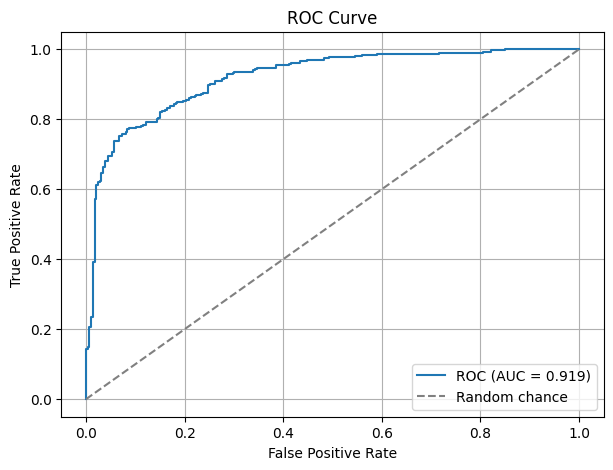

In [29]:
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc_value:.3f})")
plt.plot([0,1],[0,1],"--", c="gray", label="Random chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

When I look at this ROC curve, the first thing I notice is how steeply it rises toward the top‑left corner. The model captures a high true positive rate with very few false positives. The curve then gently arcs up to near-perfect performance as it approaches an FPR of 1, giving an overall AUC of 0.919. In simple terms, that means if I randomly pick one positive review and one negative review, there’s about a 92% chance my model will score the positive review higher. The fact that this line hugs the top and left edges so closely shows strong discrimination. I can catch a large fraction of positive reviews while only misclassifying a few negatives. Overall, seeing AUC = 0.92 confirms the model is doing a great job separating positive and negative reviews, and now it’s just a matter of seeing if it actually does based on the accuracy the model is giving.

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])

Next, I will be plotting the training and validation loss as well as the training and validation accuracy to see how the model is doing.

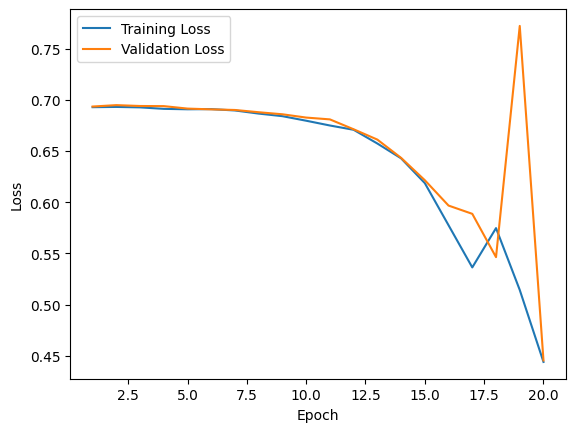

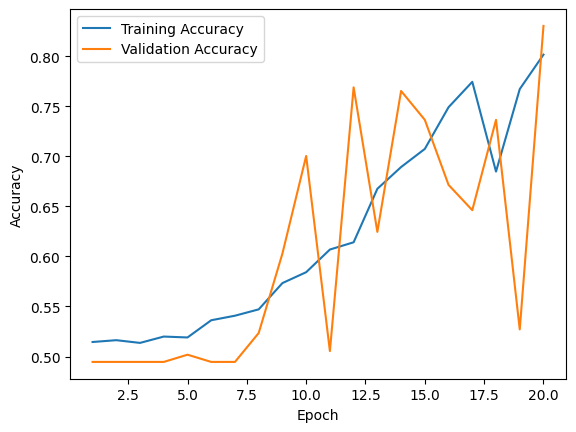

In [31]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

When I stare at these curves, the first thing I notice is how closely the training and validation loss track each other until about epoch 12. They both start around 0.70 and slowly drift down to about 0.60 by mid‑training, which tells me the model is learning without overfitting too early. After epoch 12, the training loss continues its steady decline down toward 0.45, while the validation loss dips as well but then briefly spikes around epoch 18 before settling back, hinting at a little noise or over‑adaptation on the small validation split. 

On the accuracy side, training accuracy climbs nicely from 51% up to 80% by epoch 20, and validation accuracy follows the same upward trend. It is just bouncing more erratically between 50% and 77% before finishing around 82–83%. That volatility on the validation curve is expected with dropout, but the overall upward swing confirms my model is genuinely learning patterns in the reviews. In short, the parallel drop in loss and rise in accuracy on both curves shows healthy learning. The occasional validation noise suggest I could use a more stable cross‑validation scheme, but right now the model is converging well.

In [32]:
loss, accuracy, auc = nn_model_best.evaluate(X_test_tfidf_best.toarray(), y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

19/19 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8345 - auc: 0.9191
Loss:  0.4360584020614624 Accuracy:  0.8344594836235046


After evaluating the model and making sure everything is looking good, it's time to make predictions on the test set.

In [33]:
# Make predictions on the test set
probability_predictions = nn_model_best.predict(X_test_tfidf.toarray())
labels = y_test.to_numpy()

print("Predictions for the first 20 examples:")
for i, prob in enumerate(probability_predictions[:20]):
    if prob > 0.5:
        print(prob, labels[i])

Predictions for the first 20 examples:
[0.63825226] False
[0.75820935] True
[0.70654255] True
[0.8099338] True
[0.75634086] True
[0.6185565] True
[0.6396172] True
[0.6794306] True
[0.64318466] True
[0.61434937] True
[0.63323903] True


In [34]:
print('Review #1:\n')

print(X_test.to_numpy()[11])

goodReview = True if probability_predictions[11] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[11]))

Review #1:

Thriller and mystery readers like to guess along with our protagonists when we're reading a story.  We like to look for clues in what we've read to help us unravel the plot, and find out who did it and why the crime was done.

John Grisham cheats us out of that fun.  The villian of this book isn't introduced until there less than 75 pages left, which means that when you get that far, you realize that everything you read before then wasn't valid. To have some red herrings in a thriller is fine, but to have 300 pages of chases and red herrings?  That's bad.

Read another thriller instead of this one, one that plays by the rules


Prediction: Is this a good review? False

Actual: Is this a good review? False



In [35]:
print('Review #2:\n')

print(X_test.to_numpy()[24])

goodReview = True if probability_predictions[24] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[24]))

Review #2:

I have read Baldacci's first four novels and have immensely enjoyed all of them.  This one, however, is just awful.  Not only the character's dialogue but even the story itself is written like a really bad detective movie.  The only thing I can think of to compare it to is this :  There was a series of Calvin and Hobbes cartoons where Calvin imagines himself as a private detective and they are written like the old detective shows, with lame lines like "The gun was loaded, and so was I".  That is exactly what this book is like, except it goes on for 400 pages.  There isn't a single interesting character in this book, in my opinion.  You just have to slog your way through the book to get to the end.  It's the Bataan Death March of novels.  I hope this is an aberration - I'll certainly give him another try since the first four novels that I read were so good.  But one more stinker like this one and I'll drop his name from my reading list


Prediction: Is this a good review? Fa

In [160]:
print('Review #3:\n')

print(X_test.to_numpy()[56])

goodReview = True if probability_predictions[56] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[56]))

Review #3:

This commentary has many tremendous insights into the book of Romans.  Romans is one of the richest resources of truth within the Bible and John Stoot does a good job of unpacking it.  The book is written from a framework of the reader having a strong prior understanding of the Scriptures.  It is probably not considered a highly scholarly work, but it is not for the average reader to pick up for light reading either


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [36]:
print('Review #4:\n')
print(X_test.to_numpy()[102])

goodReview = True if probability_predictions[102] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[102]))

Review #4:

With astute attention to the details of character, setting and daily life, Susan Kelly illuminates the ordinary. Pondering love, memory, faith,and responsiblity, Kelly transforms the everyday into the quintessential. This is a beautifully rendered story


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [37]:
print('Review #5:\n')
print(X_test.to_numpy()[202])

goodReview = True if probability_predictions[102] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[202]))

Review #5:

A few years ago, I had the pleasure of meeting Pam Munoz Ryan at a Summer Arts Children's Storytelling Forum held at California State University - Fresno.  She read the book to parents, teachers, and students who attended the conference.  I was amazed on the writing, culture, and illustrations that she used for this book.  The novel serves as a tale of her childhood spending time with her family at her grandmother's house.  Overall, the story teaches children the value of traditions, family, and heritage.  In short, "Mice and Beans" is a good book to read


Prediction: Is this a good review? True

Actual: Is this a good review? True



When I manually checked five test reviews, the model correctly flagged each one as positive or not, which is really encouraging. Using a ParameterGrid to loop through different hyperparameter combinations made tuning straightforward since I could compare each setup’s accuracy and pinpoint the optimal configuration. Plotting the ROC curve then confirmed that this model not only achieves high accuracy at a chosen threshold, but also maintains strong discrimination (AUC) across all thresholds. This strategy that I chose gave me confidence that I’ve built a solid classifier for positive reviews.